In [1]:
#Importings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

pd.pandas.set_option("display.max_columns", None)

In [2]:
#Importing thr training dataset
trainset = pd.read_csv("./train.csv")
print(trainset.shape)

(1460, 81)


In [3]:
#Checing out the first five columns of data
trainset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
#Checking how many missing values are present in each fiture in percentage
#step1: Checking in which features null value exist
features_with_nan = [features for features in trainset.columns if trainset[features].isnull().sum() > 1]

#Step2: Converting the null values into the percentage
for feature in features_with_nan:
    print(feature, np.round(trainset[feature].isnull().mean(),4), " % missing values")

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


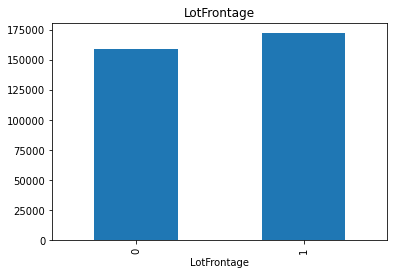

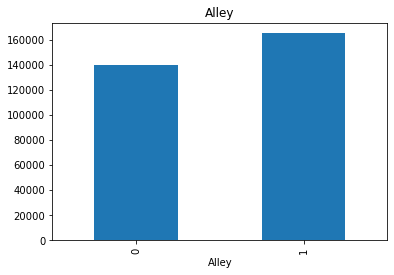

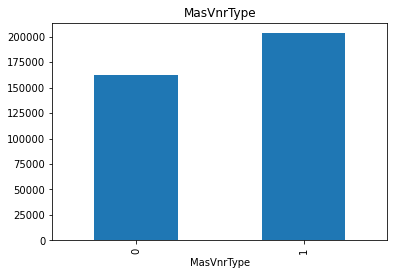

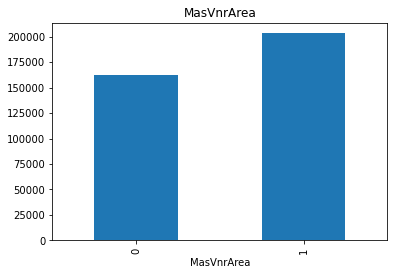

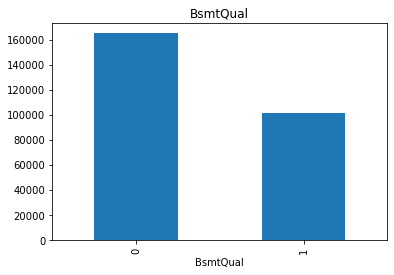

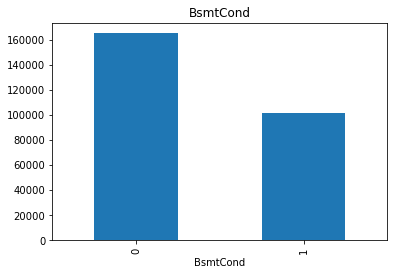

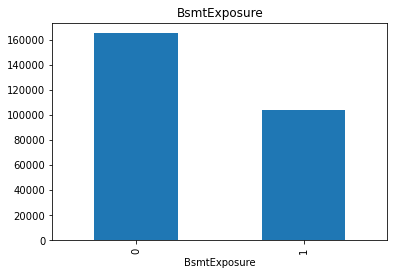

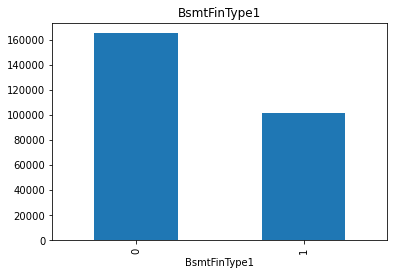

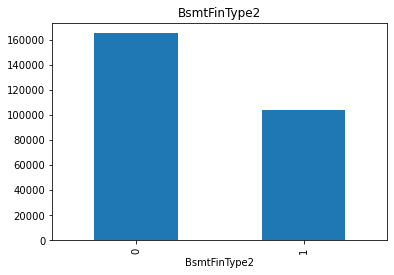

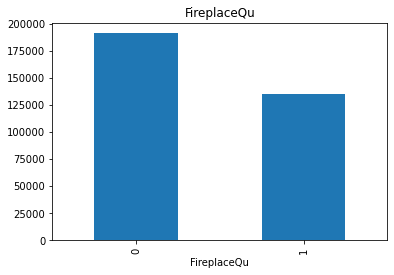

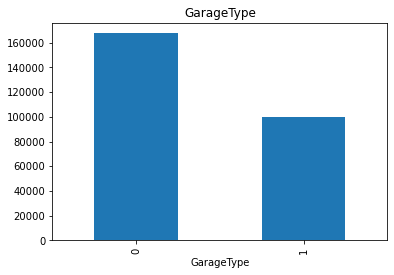

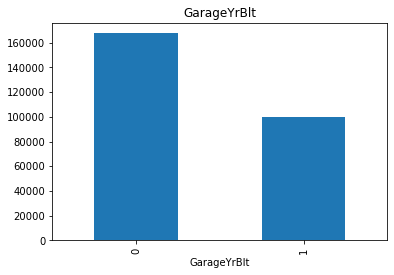

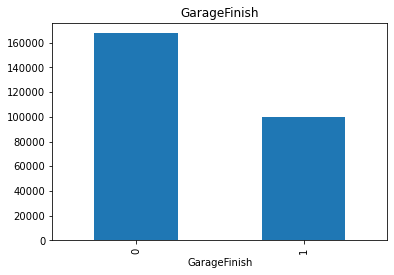

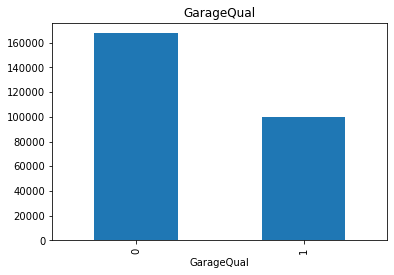

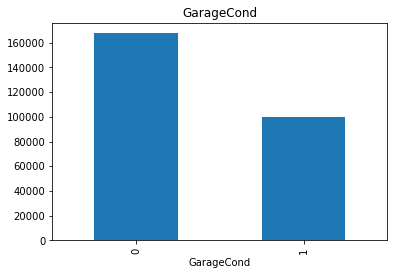

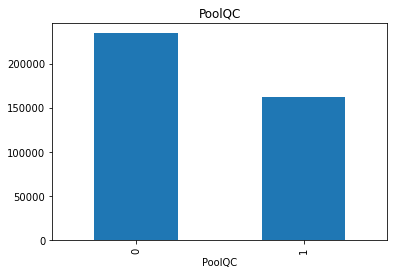

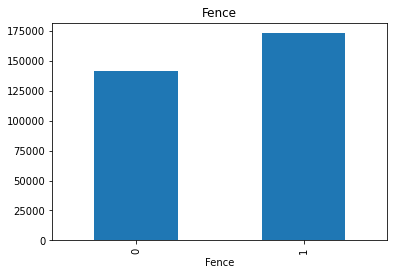

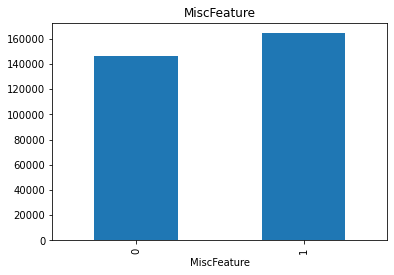

In [5]:
#Finding out the Relationship between null values and the price

for feature in features_with_nan:
    data = trainset.copy()
    #Variable that indicate 1 as null 
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    #Comparing sales price with missing or present data
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.show()

In [6]:
#It is clear that the missing values are playing a major role in the sales price, so we need to replace these null values with something meaningfull


In [7]:
print(len(trainset.Id))

1460


In [8]:
#Finding out the number of numerical variable
numberical_features = [feature for feature in trainset.columns if trainset[feature].dtype != "O"]

print(len(numberical_features))
trainset[numberical_features].head()

38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [9]:
#Retriving year feature from numerical features
year_feature = [feature for feature in numberical_features if "Yr" in feature or "Year" in feature]
print(year_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [10]:
for feature in year_feature:
    print(feature, trainset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'Sales Price vs Year Sold')

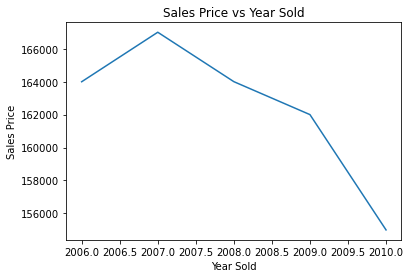

In [11]:
#Ploting graph in comparison with sales price and year sold 
trainset.groupby("YrSold")["SalePrice"].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Sales Price")
plt.title("Sales Price vs Year Sold")

In [12]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

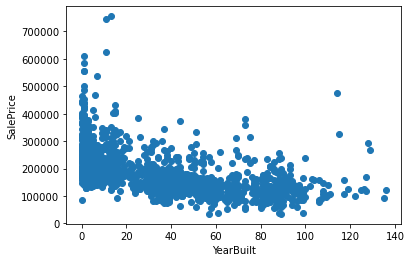

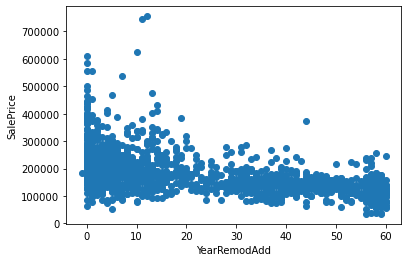

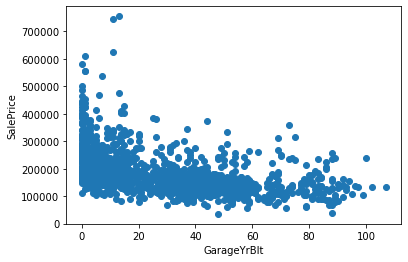

In [13]:
#Comparing Sales Price with every other year feature
for feature in year_feature:
    if feature != "YrSold":
        data = trainset.copy()
        data[feature] = data["YrSold"] - data[feature]

        plt.scatter(data[feature], data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

In [14]:
#Retriving Descrete Variable 
discrete_feature = [feature for feature in numberical_features if len(trainset[feature].unique())<25 and feature not in year_feature+["Id"]]
print(len(discrete_feature))


17


In [15]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [16]:
trainset[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

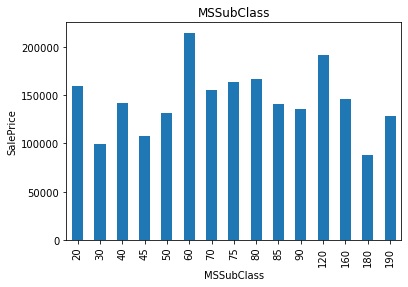

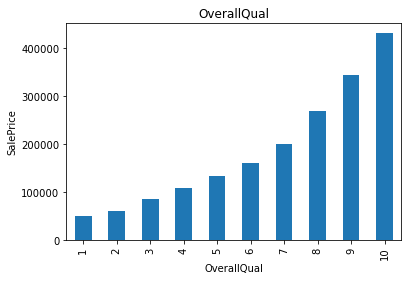

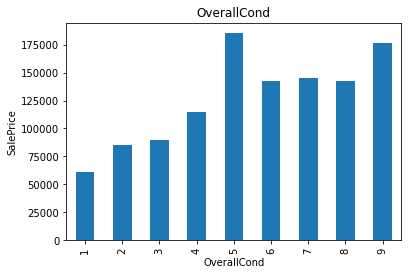

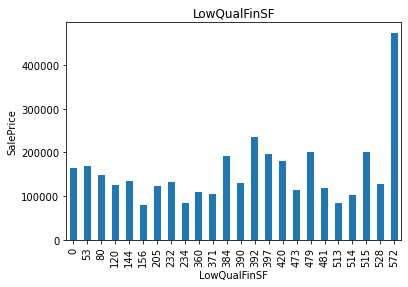

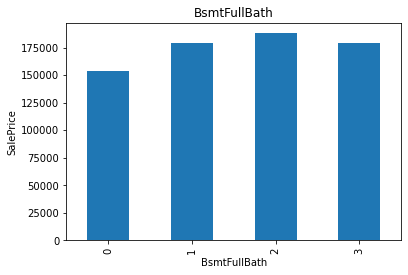

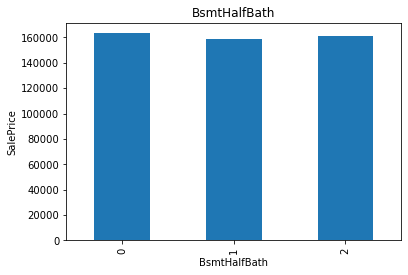

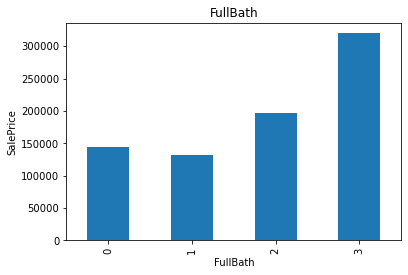

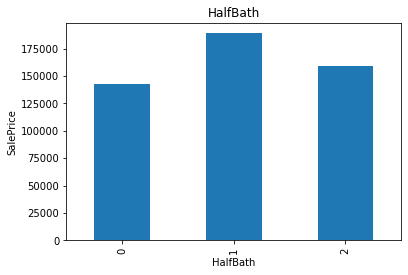

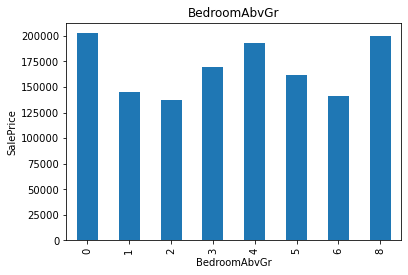

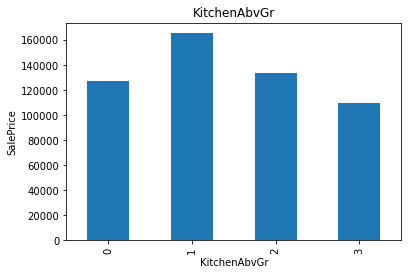

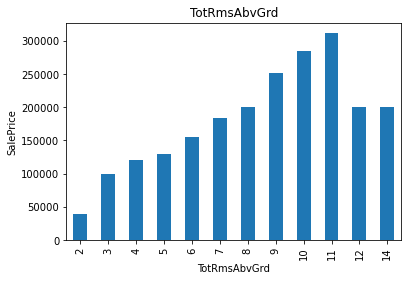

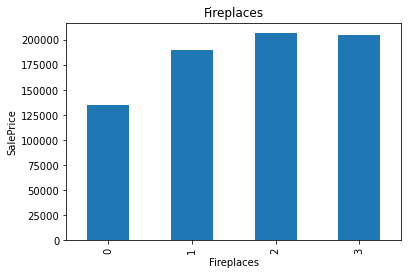

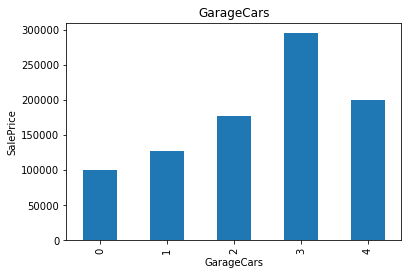

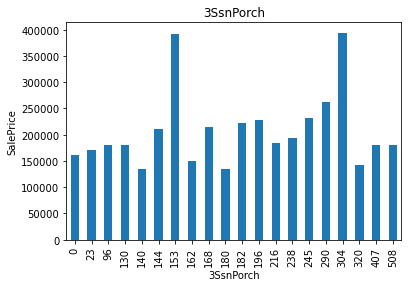

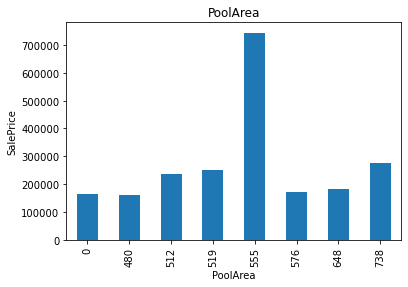

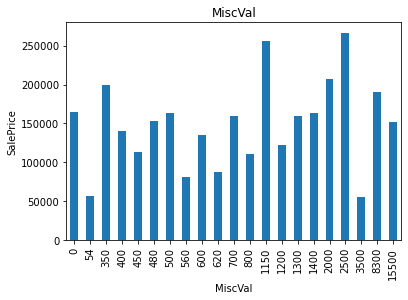

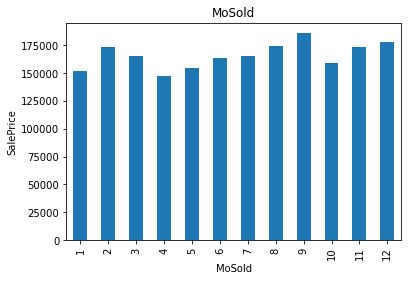

In [17]:
#finding relation between discrete numericals and sales price
for feature in discrete_feature:
    data = trainset.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

In [18]:
#Retriving Continious Varibale
continious_features = [feature for feature in numberical_features if feature not in discrete_feature+year_feature+["Id"]]
print(len(continious_features))

16


In [19]:
continious_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

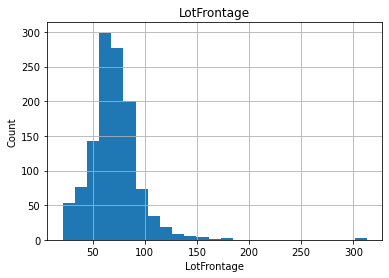

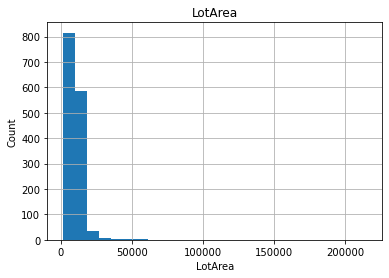

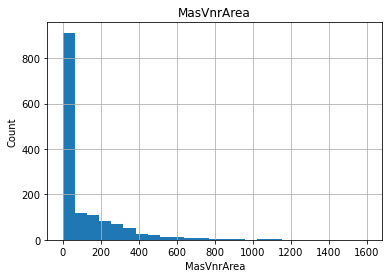

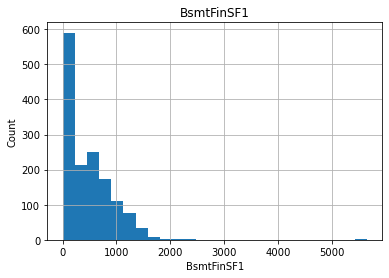

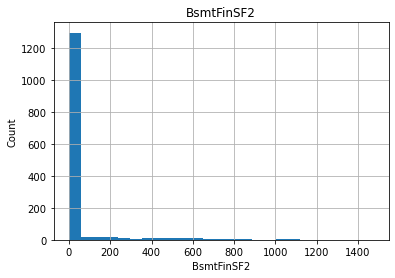

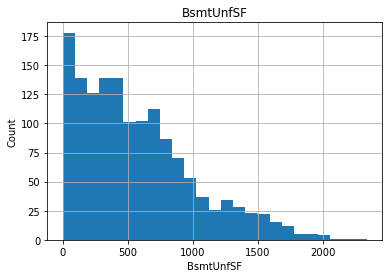

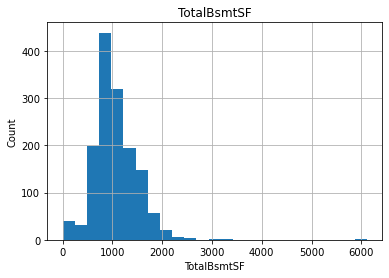

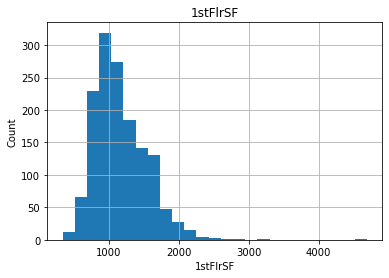

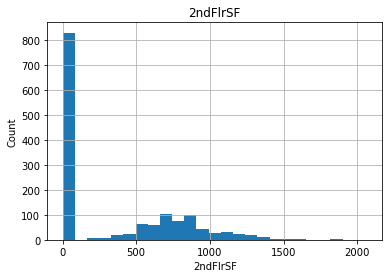

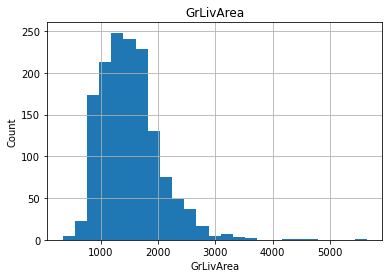

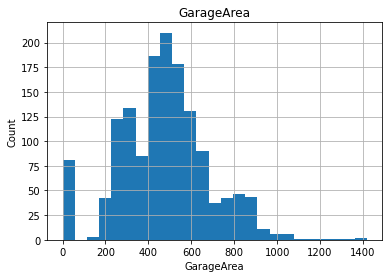

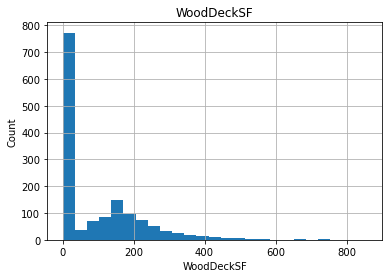

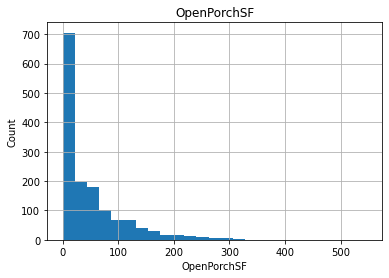

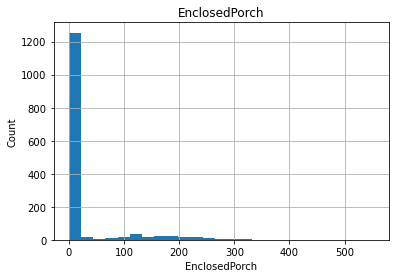

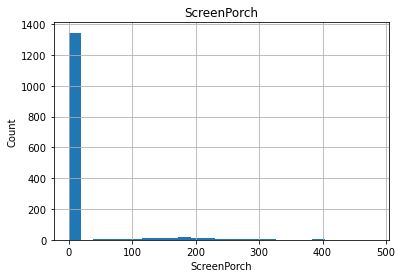

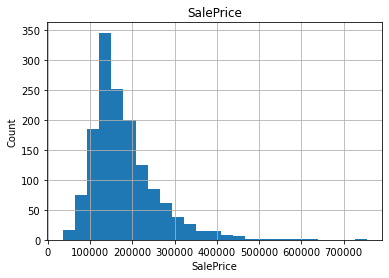

In [20]:
#analyse the continious values by histogram
for feature in continious_features:
    data = trainset.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

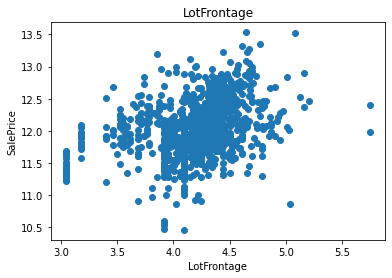

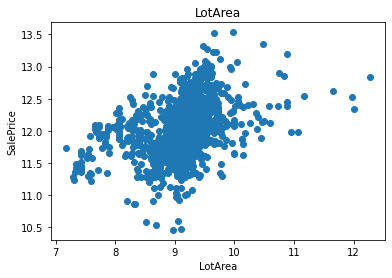

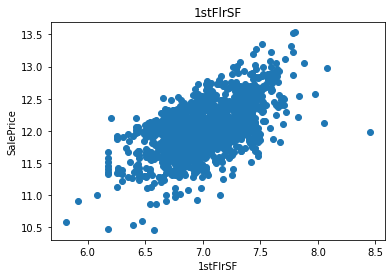

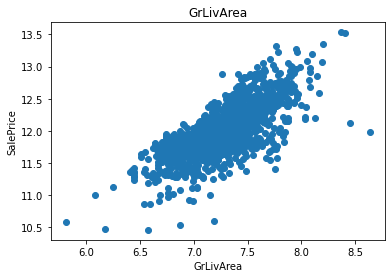

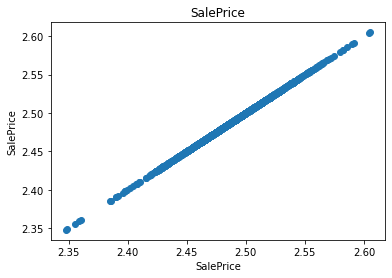

In [21]:
#we'll be using Logrithmic Transformation

for feature in continious_features:
    data = trainset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data["SalePrice"])
        plt.scatter(data[feature], data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.title(feature)
        plt.show()

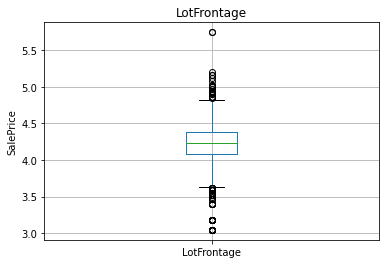

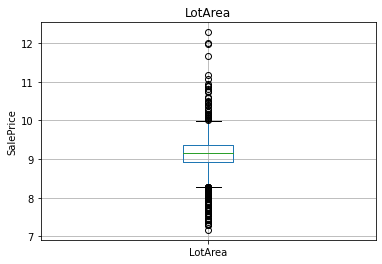

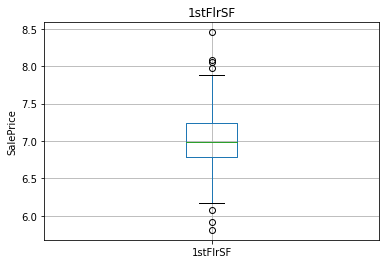

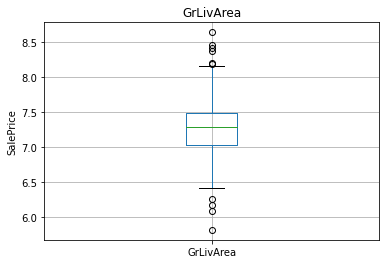

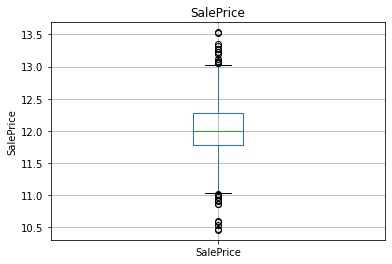

In [22]:
for feature in continious_features:
    data = trainset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel("SalePrice")
        plt.title(feature)
        plt.show()

In [23]:
#Categorical Feature
categorical_features = [feature for feature in trainset.columns if data[feature].dtype == 'O'] 
categorical_features    

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [24]:
trainset[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [25]:
for feature in categorical_features:
    print(feature, len(trainset[feature].unique()))

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


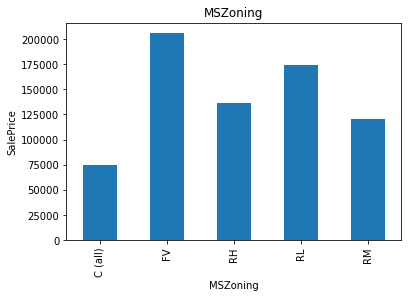

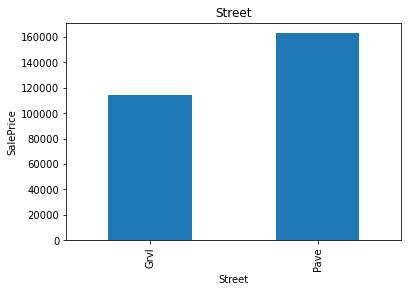

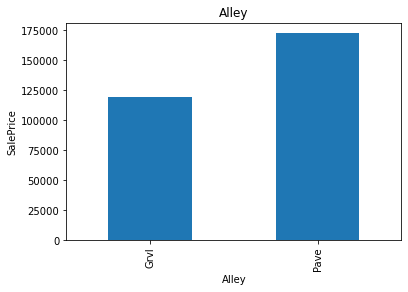

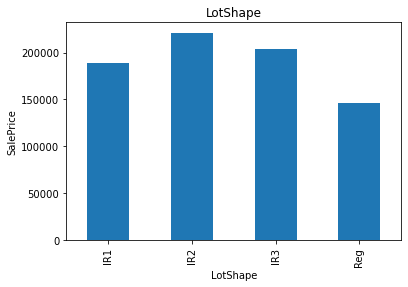

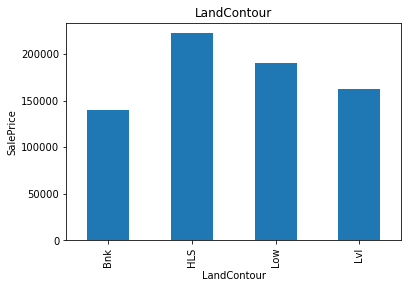

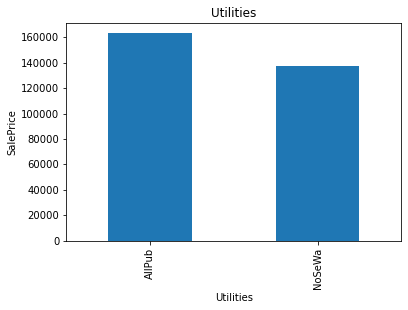

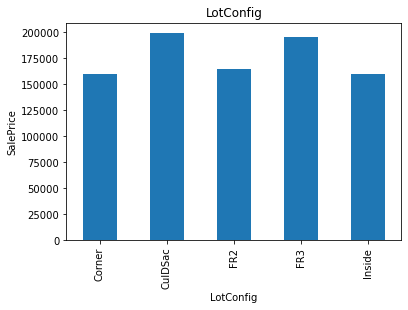

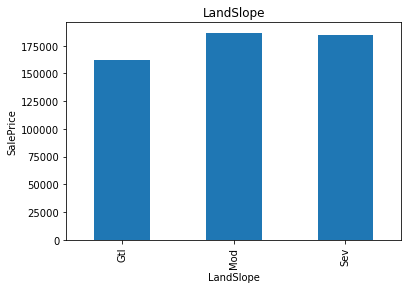

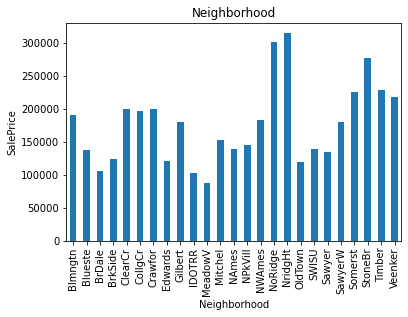

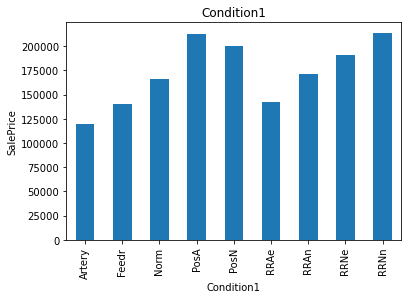

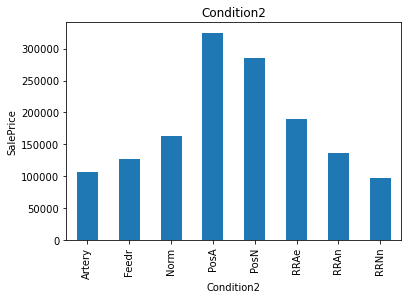

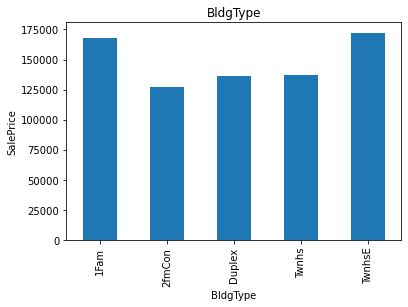

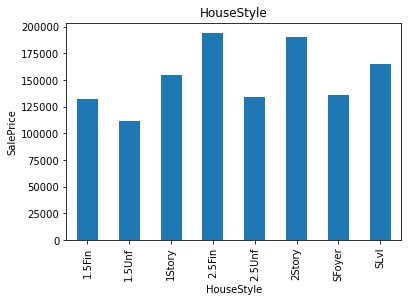

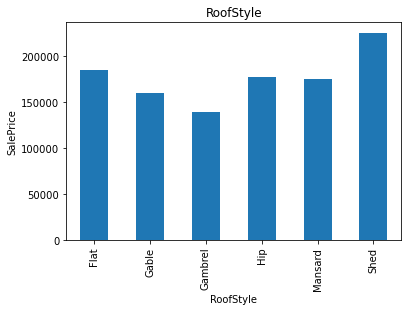

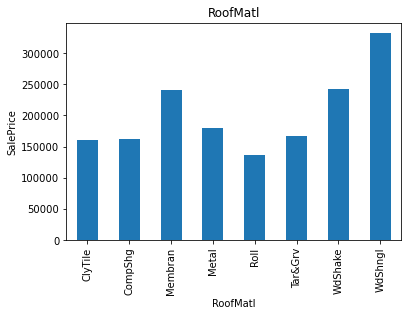

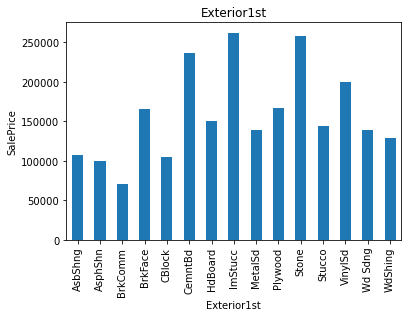

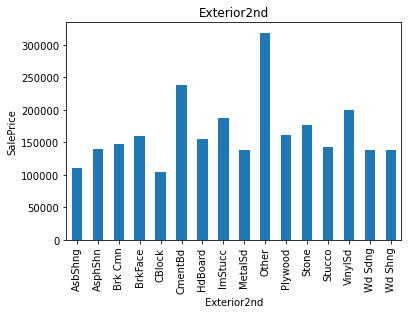

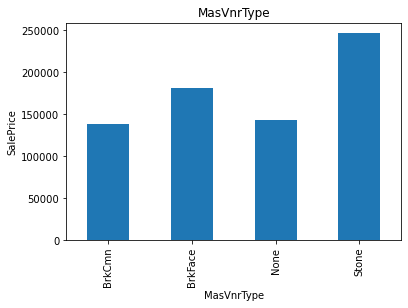

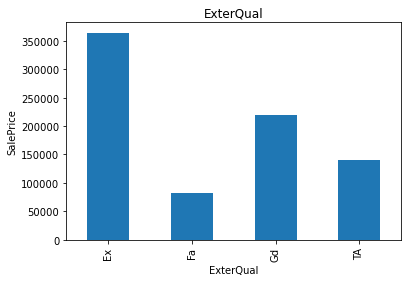

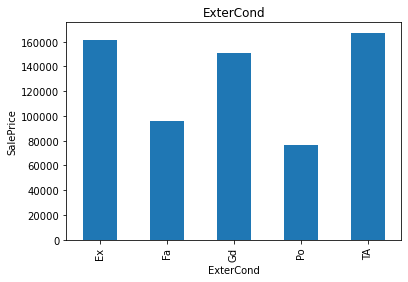

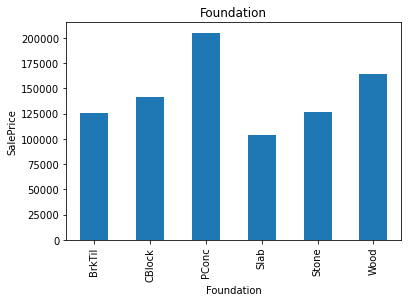

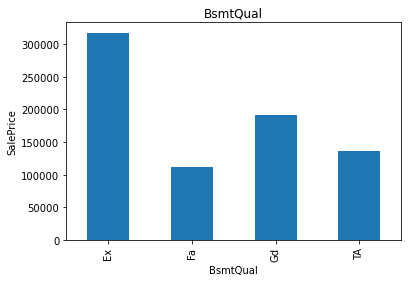

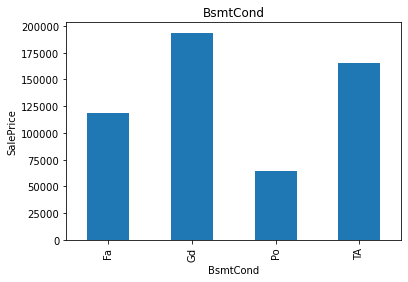

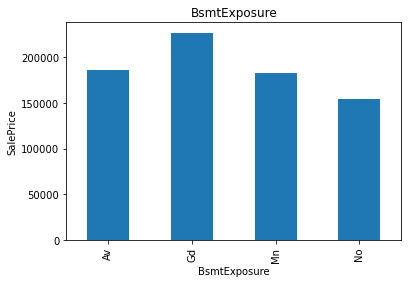

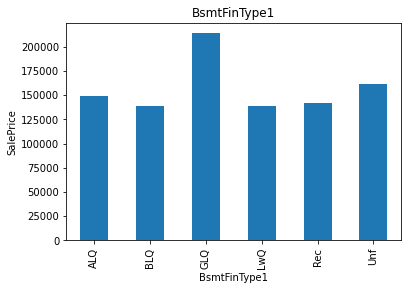

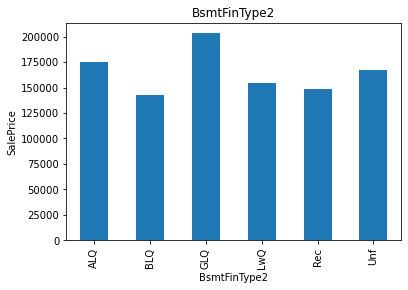

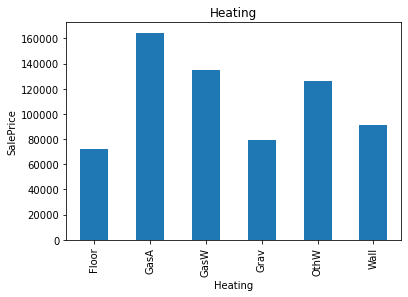

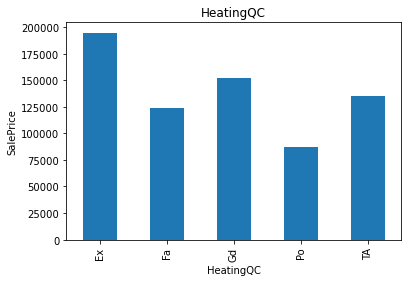

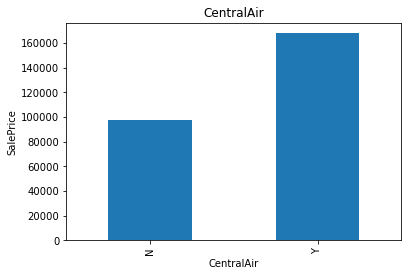

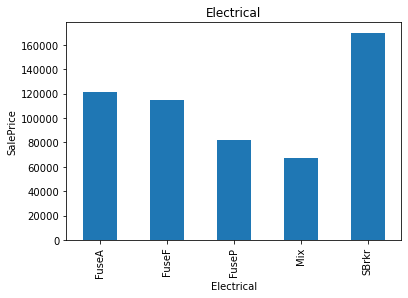

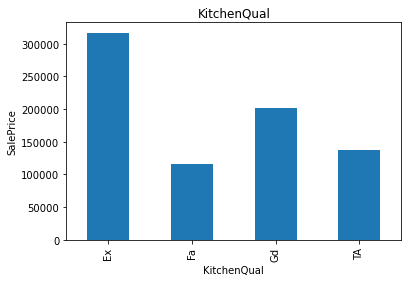

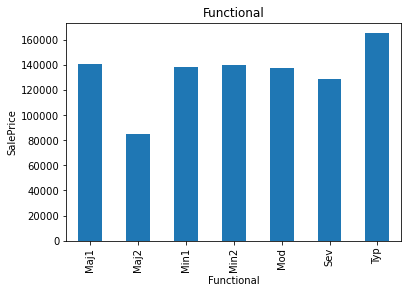

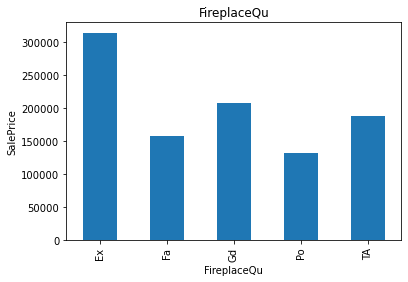

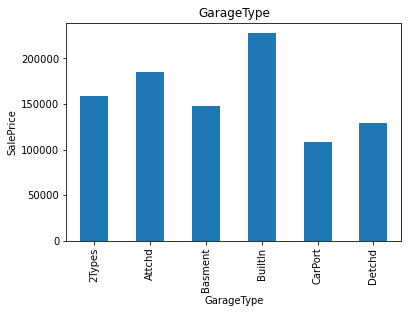

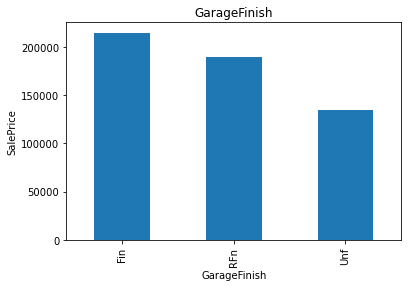

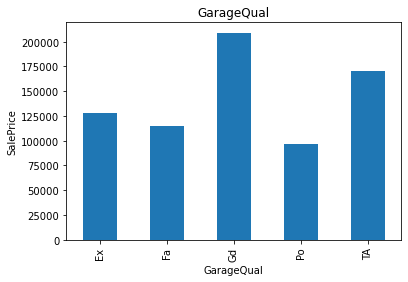

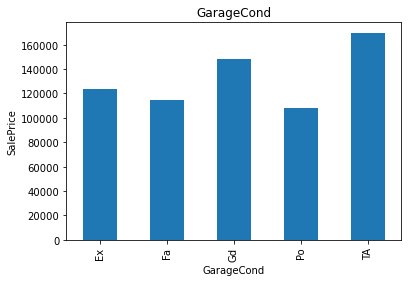

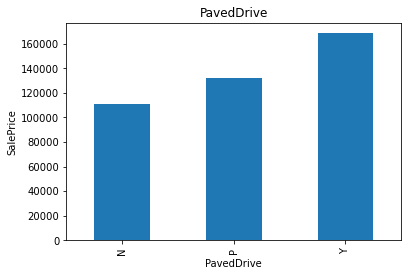

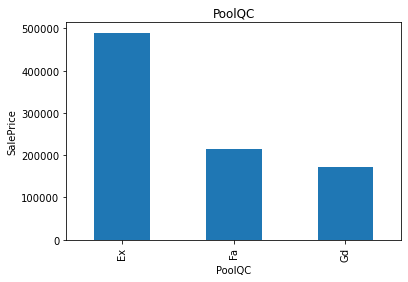

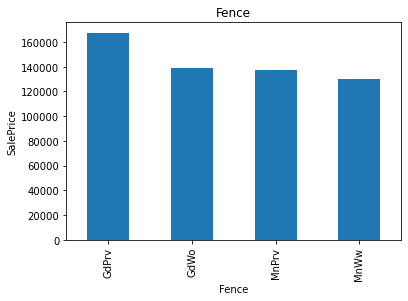

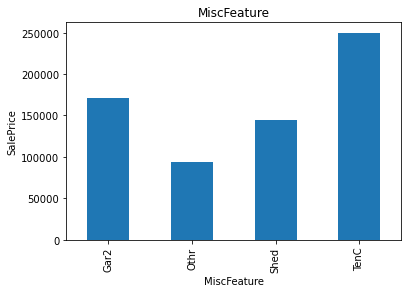

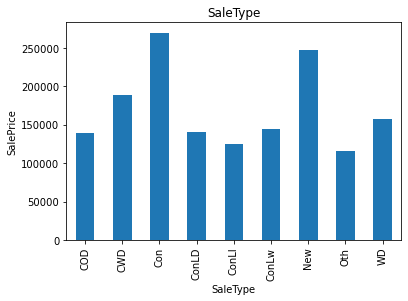

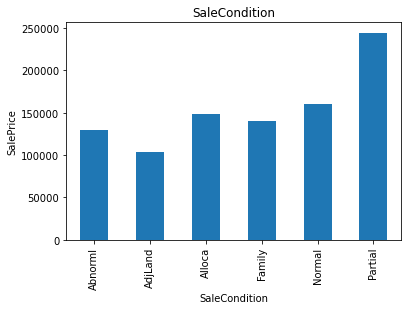

In [26]:
#finding out the relation between categorical variable znd dependent variable
for feature in categorical_features:
    data = trainset.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainset, trainset["SalePrice"], test_size = 0.1, random_state = 0)

In [28]:
X_train.shape, X_test.shape

((1314, 81), (146, 81))

In [29]:
#Capturing all the nan values
features_nan = [feature for feature in trainset.columns if trainset[feature].isnull().sum() > 1 and trainset[feature].dtype == "O"]
for feature in features_nan:
    print(feature, np.round(trainset[feature].isnull().mean(), 4))

Alley 0.9377
MasVnrType 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
FireplaceQu 0.4726
GarageType 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


In [30]:
#Replacing missing value with new label
def replace_cat_feature(trainset, features_nan):
    data = trainset.copy()
    data[features_nan] = data[features_nan].fillna("Missing")
    return data
trainset = replace_cat_feature(trainset, features_nan)
trainset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [31]:
trainset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [32]:
#Now lets check for numerical values contains missing values
numerical_with_nan = [feature for feature in trainset.columns if trainset[feature].isnull().sum() > 1 and trainset[feature].dtype != "O"]

#Now printing the numerical nan variable and percentage of missing values
for feature in numerical_with_nan:
    print(feature, np.around(trainset[feature].isnull().mean(), 4))

LotFrontage 0.1774
MasVnrArea 0.0055
GarageYrBlt 0.0555


In [33]:
for feature in numerical_with_nan:
    median_value = trainset[feature].median()
    trainset[feature + "nan"] = np.where(trainset[feature].isnull(),1,0)
    trainset[feature].fillna(median_value, inplace = True)
trainset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [34]:
trainset.head(50)

Missing   
13             1          Gd             7        Typ           1          Gd   
14             1          TA             5        Typ           1          Fa   
15             1          TA             5        Typ           0     Missing   
16             1          TA             5        Typ           1          TA   
17             2          TA             6        Typ           0     Missing   
18             1          Gd             6        Typ           0     Missing   
19             1          TA             6       Min1           0     Missing   
20             1          Gd             9        Typ           1          Gd   
21             1          Gd             6        Typ           1          Gd   
22             1          Gd             7        Typ           1          Gd   
23             1          TA             6        Typ           1          TA   
24             1          Gd             6        Typ           1          TA   
25             1          Gd             7        Typ           1          Gd   
26             1          Gd             5        Typ           0     Missing   
27             1          Gd             7        Typ           1          Gd   
28             1          TA             6        Typ           2          Gd   
29             1          Fa             4        Typ           0     Missing   
30             1          TA             6        Typ           0     Missing   
31             1          Gd             6        Typ           0     Missing   
32             1          Gd             7        Typ           0     Missing   
33             1          Gd             6        Typ           1          Gd   
34             1          Ex             6        Typ           1          Gd   
35             1          Gd             9        Typ           1          Gd   
36             1          TA             6        Typ           0     Missing   
37             1          TA             5        Typ           1          TA   
38             1          Gd             5        Typ           0     Missing   
39             2          Fa             6        Typ           0     Missing   
40             1          TA             6        Typ           1          TA   
41             1          TA             5        Typ           2          Gd   
42             1          Gd             5        Typ           0     Missing   
43             1          TA             5        Typ           0     Missing   
44             1          TA             6        Typ           0     Missing   
45             1          Ex             6        Typ           1          Gd   
46             1          Gd             6        Typ           1          Ex   
47             1          Gd             7        Typ           0     Missing   
48             3          TA             8        Typ           0     Missing   
49             1          TA             6        Typ           0     Missing   

   GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0      Attchd       2003.0          RFn           2         548         TA   
1      Attchd       1976.0          RFn           2         460         TA   
2      Attchd       2001.0          RFn           2         608         TA   
3      Detchd       1998.0          Unf           3         642         TA   
4      Attchd       2000.0          RFn           3         836         TA   
5      Attchd       1993.0          Unf           2         480         TA   
6      Attchd       2004.0          RFn           2         636         TA   
7      Attchd       1973.0          RFn           2         484         TA   
8      Detchd       1931.0          Unf           2         468         Fa   
9      Attchd       1939.0          RFn           1         205         Gd   
10     Detchd       1965.0          Unf           1         384         TA   
11    BuiltIn       2005.0          Fin           3    

In [35]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [36]:
#Temporal variable (Date time variable)
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    trainset[feature] = trainset["YrSold"] - trainset[feature]

In [37]:
trainset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [38]:
trainset[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

In [39]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num_features:
    trainset[feature] = np.log(trainset[feature])

In [40]:
trainset.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

In [41]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [42]:
for feature in categorical_features:
    temp = trainset.groupby(feature)["SalePrice"].count()/len(trainset)
    temp_df = temp[temp>0.1].index
    trainset[feature] = np.where(trainset[feature].isin(temp_df), trainset[feature], "Rare_var")

In [49]:
trainset.head(10)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   
5   6          50       RL     4.442651  9.554993   Pave  Missing      IR1   
6   7          20       RL     4.317488  9.218705   Pave  Missing      Reg   
7   8          60       RL     4.234107  9.247829   Pave  Missing      IR1   
8   9          50       RM     3.931826  8.719317   Pave  Missing      Reg   
9  10         190       RL     3.912023  8.911934   Pave  Missing      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub  Rare_var       Gtl     Rare_var   Rare_var   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl     Rare_var       Norm   
4         Lvl    AllPub  Rare_var       Gtl     Rare_var       Norm   
5         Lvl    AllPub    Inside       Gtl     Rare_var       Norm   
6         Lvl    AllPub    Inside       Gtl     Rare_var       Norm   
7         Lvl    AllPub    Corner       Gtl     Rare_var   Rare_var   
8         Lvl    AllPub    Inside       Gtl     Rare_var   Rare_var   
9         Lvl    AllPub    Corner       Gtl     Rare_var   Rare_var   

  Condition2  BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm      1Fam     2Story            7            5          5   
1       Norm      1Fam     1Story            6            8         31   
2       Norm      1Fam     2Story            7            5          7   
3       Norm      1Fam     2Story            7            5         91   
4       Norm      1Fam     2Story            8            5          8   
5       Norm      1Fam     1.5Fin            5            5         16   
6       Norm      1Fam     1Story            8            5          3   
7       Norm      1Fam     2Story            7            6         36   
8       Norm      1Fam     1.5Fin            7            5         77   
9   Rare_var  Rare_var   Rare_var            5            6         69   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng    Rare_var       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5            14     Gable  CompShg     VinylSd     VinylSd       None   
6             2     Gable  CompShg     VinylSd     VinylSd   Rare_var   
7            36     Gable  CompShg     HdBoard     HdBoard   Rare_var   
8            58     Gable  CompShg    Rare_var    Rare_var       None   
9            58     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation  BsmtQual  BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc        Gd        TA           No   
1         0.0        TA        TA     CBlock        Gd        TA     Rare_var   
2       162.0        Gd        TA      PConc        Gd        TA     Rare_var   
3         0.0        TA        TA   Rare_var        TA  Rare_var           No   
4       350.0        Gd        TA      PConc        Gd        TA           Av   
5         0.0        TA        TA   Rare_var        Gd        TA           No   
6       186.0        Gd        TA      PConc  Rare_var        TA           Av   
7       240.0        TA        TA     CBlock        Gd        TA     Rare_var   
8         0.0 

In [50]:
for feature in categorical_features:
    labels_ordered=trainset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    trainset[feature]=trainset[feature].map(labels_ordered)

In [51]:
trainset.head(10)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         2     4.174387  9.041922       1      1         0   
1   2          20         2     4.382027  9.169518       1      1         0   
2   3          60         2     4.219508  9.328123       1      1         1   
3   4          70         2     4.094345  9.164296       1      1         1   
4   5          60         2     4.430817  9.565214       1      1         1   
5   6          50         2     4.442651  9.554993       1      1         1   
6   7          20         2     4.317488  9.218705       1      1         0   
7   8          60         2     4.234107  9.247829       1      1         1   
8   9          50         0     3.931826  8.719317       1      1         0   
9  10         190         2     3.912023  8.911934       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          1          0          0             2           1   
1            0          1          2          0             1           0   
2            0          1          0          0             2           1   
3            0          1          1          0             1           1   
4            0          1          2          0             1           1   
5            0          1          0          0             1           1   
6            0          1          0          0             1           1   
7            0          1          1          0             1           0   
8            0          1          0          0             1           0   
9            0          1          1          0             1           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         1           3            7            5          5   
1           1         1           2            6            8         31   
2           1         1           3            7            5          7   
3           1         1           3            7            5         91   
4           1         1           3            8            5          8   
5           1         1           0            5            5         16   
6           1         1           2            8            5          3   
7           1         1           3            7            6         36   
8           1         1           0            7            5         77   
9           0         0           1            5            6         69   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             5          0         0            4            4           1   
1            31          0         0            1            1           0   
2             6          0         0            4            4           1   
3            36          0         0            0            3           0   
4             8          0         0            4            4           1   
5            14          0         0            4            4           0   
6             2          0         0            4            4           2   
7            36          0         0            2            2           2   
8            58          0         0            3            3           0   
9            58          0         0            1            1           0   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          1          1           2         1         1   
1         0.0          0          1           1         1         1   
2       162.0          1          1           2         1         1   
3         0.0          0          1           0         0         0   
4       350.0          1          1           2         1         1   
5         0.0          0          1           0         1         1   
6       186.0          1          1           2         2         1   
7       240.0        

In [52]:
scaling_feature=[feature for feature in trainset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

In [53]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [54]:
#Feature Scaling

feature_scale=[feature for feature in trainset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(trainset[feature_scale])

MinMaxScaler()

In [55]:
scaler.transform(trainset[feature_scale])

array([[0.23529412, 1.        , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 1.        , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 1.        , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [57]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([trainset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(trainset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [58]:
data.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294       1.0     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000       1.0     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294       1.0     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118       1.0     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294       1.0     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0       0.0          0.0        1.0        0.0        0.0           1.0   
1       0.0          0.0        1.0        1.0        0.0           0.5   
2       0.5          0.0        1.0        0.0        0.0           1.0   
3       0.5          0.0        1.0        0.5        0.0           0.5   
4       0.5          0.0        1.0        1.0        0.0           0.5   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         1.0         1.0       1.0    1.000000     0.666667        0.500   
1         0.0         1.0       1.0    0.666667     0.555556        0.875   
2         1.0         1.0       1.0    1.000000     0.666667        0.500   
3         1.0         1.0       1.0    1.000000     0.666667        0.500   
4         1.0         1.0       1.0    1.000000     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.098361        0.0       0.0         1.00         1.00   
1   0.227941      0.524590        0.0       0.0         0.25         0.25   
2   0.051471      0.114754        0.0       0.0         1.00         1.00   
3   0.669118      0.606557        0.0       0.0         0.00         0.75   
4   0.058824      0.147541        0.0       0.0         1.00         1.00   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0         0.5     0.12250        0.5        1.0         1.0       0.5   
1         0.0     0.00000        0.0        1.0         0.5       0.5   
2         0.5     0.10125        0.5        1.0         1.0       0.5   
3         0.0     0.00000        0.0        1.0         0.0       0.0   
4         0.5     0.21875        0.5        1.0         1.0       0.5   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0       1.0           0.0           1.0    0.125089           1.0         0.0   
1       1.0           0.5           0.5    0.173281           1.0         0.0   
2       1.0           0.5           1.0    0.086109           1.0         0.0   
3       0.0           0.0           0.5    0.038271           1.0         0.0   
4       1.0           1.0           1.0    0.116052           1.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0   1.000000         1.0         1.0   
1   0.121575     0.206547      1.0   1.000000         1.0         1.0   
2   0.185788     0.150573      1.0   1.000000         1.0         1.0   
3   0.231164     0.123732      1.0   0.666667         1.0         1.0   
4   0.209760     0.187398      1.0   1.000000         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333          0.5      0.500000   
1  0.666667       0.0         0.375      0.333333          0.0      0.333333   
2  0.666667       0.5         0.375      0.333333          0.5      0.3

In [59]:
data.to_csv("X_train.csv", index = False)

In [63]:
#Feature Selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [70]:
dataset = pd.read_csv("X_train.csv")
y_train = dataset[["SalePrice"]]
X_train = dataset.drop(["Id", "SalePrice"], axis = 1)

In [72]:
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0    0.235294       1.0     0.418208  0.366344     1.0    1.0       0.0   
1    0.000000       1.0     0.495064  0.391317     1.0    1.0       0.0   
2    0.235294       1.0     0.434909  0.422359     1.0    1.0       0.5   
3    0.294118       1.0     0.388581  0.390295     1.0    1.0       0.5   
4    0.235294       1.0     0.513123  0.468761     1.0    1.0       0.5   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0          0.0        1.0        0.0        0.0           1.0         1.0   
1          0.0        1.0        1.0        0.0           0.5         0.0   
2          0.0        1.0        0.0        0.0           1.0         1.0   
3          0.0        1.0        0.5        0.0           0.5         1.0   
4          0.0        1.0        1.0        0.0           0.5         1.0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         1.0       1.0    1.000000     0.666667        0.500   0.036765   
1         1.0       1.0    0.666667     0.555556        0.875   0.227941   
2         1.0       1.0    1.000000     0.666667        0.500   0.051471   
3         1.0       1.0    1.000000     0.666667        0.500   0.669118   
4         1.0       1.0    1.000000     0.777778        0.500   0.058824   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.098361        0.0       0.0         1.00         1.00         0.5   
1      0.524590        0.0       0.0         0.25         0.25         0.0   
2      0.114754        0.0       0.0         1.00         1.00         0.5   
3      0.606557        0.0       0.0         0.00         0.75         0.0   
4      0.147541        0.0       0.0         1.00         1.00         0.5   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0     0.12250        0.5        1.0         1.0       0.5       1.0   
1     0.00000        0.0        1.0         0.5       0.5       1.0   
2     0.10125        0.5        1.0         1.0       0.5       1.0   
3     0.00000        0.0        1.0         0.0       0.0       0.0   
4     0.21875        0.5        1.0         1.0       0.5       1.0   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0           0.0           1.0    0.125089           1.0         0.0   
1           0.5           0.5    0.173281           1.0         0.0   
2           0.5           1.0    0.086109           1.0         0.0   
3           0.0           0.5    0.038271           1.0         0.0   
4           1.0           1.0    0.116052           1.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0   1.000000         1.0         1.0   
1   0.121575     0.206547      1.0   1.000000         1.0         1.0   
2   0.185788     0.150573      1.0   1.000000         1.0         1.0   
3   0.231164     0.123732      1.0   0.666667         1.0         1.0   
4   0.209760     0.187398      1.0   1.000000         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333          0.5      0.500000   
1  0.666667       0.0         0.375      0.333333          0.0      0.333333   
2  0.666667       0.5         0.375      0.333333          0.5      0.333333   
3  0.333333       0.0         0.375      0.333333          0.5      0.416667   
4

In [73]:
y_train.head()

SalePrice
0  12.247694
1  12.109011
2  12.317167
3  11.849398
4  12.429216

In [74]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0)) # remember to set the seed, the random state in this function

feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [75]:
feature_sel_model.get_support()

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [76]:
dataset.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294       1.0     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000       1.0     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294       1.0     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118       1.0     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294       1.0     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0       0.0          0.0        1.0        0.0        0.0           1.0   
1       0.0          0.0        1.0        1.0        0.0           0.5   
2       0.5          0.0        1.0        0.0        0.0           1.0   
3       0.5          0.0        1.0        0.5        0.0           0.5   
4       0.5          0.0        1.0        1.0        0.0           0.5   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         1.0         1.0       1.0    1.000000     0.666667        0.500   
1         0.0         1.0       1.0    0.666667     0.555556        0.875   
2         1.0         1.0       1.0    1.000000     0.666667        0.500   
3         1.0         1.0       1.0    1.000000     0.666667        0.500   
4         1.0         1.0       1.0    1.000000     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.098361        0.0       0.0         1.00         1.00   
1   0.227941      0.524590        0.0       0.0         0.25         0.25   
2   0.051471      0.114754        0.0       0.0         1.00         1.00   
3   0.669118      0.606557        0.0       0.0         0.00         0.75   
4   0.058824      0.147541        0.0       0.0         1.00         1.00   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0         0.5     0.12250        0.5        1.0         1.0       0.5   
1         0.0     0.00000        0.0        1.0         0.5       0.5   
2         0.5     0.10125        0.5        1.0         1.0       0.5   
3         0.0     0.00000        0.0        1.0         0.0       0.0   
4         0.5     0.21875        0.5        1.0         1.0       0.5   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0       1.0           0.0           1.0    0.125089           1.0         0.0   
1       1.0           0.5           0.5    0.173281           1.0         0.0   
2       1.0           0.5           1.0    0.086109           1.0         0.0   
3       0.0           0.0           0.5    0.038271           1.0         0.0   
4       1.0           1.0           1.0    0.116052           1.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0   1.000000         1.0         1.0   
1   0.121575     0.206547      1.0   1.000000         1.0         1.0   
2   0.185788     0.150573      1.0   1.000000         1.0         1.0   
3   0.231164     0.123732      1.0   0.666667         1.0         1.0   
4   0.209760     0.187398      1.0   1.000000         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333          0.5      0.500000   
1  0.666667       0.0         0.375      0.333333          0.0      0.333333   
2  0.666667       0.5         0.375      0.333333          0.5      0.3

In [80]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 82
selected features: 28


In [81]:
selected_feat

Index(['MSZoning', 'LotShape', 'Condition1', 'BldgType', 'OverallQual',
       'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageCond', 'PavedDrive'],
      dtype='object')

In [82]:
X_train=X_train[selected_feat]

In [83]:
X_train.head()

MSZoning  LotShape  Condition1  BldgType  OverallQual  YearRemodAdd  \
0       1.0       0.0         1.0       1.0     0.666667      0.098361   
1       1.0       0.0         0.0       1.0     0.555556      0.524590   
2       1.0       0.5         1.0       1.0     0.666667      0.114754   
3       1.0       0.5         1.0       1.0     0.666667      0.606557   
4       1.0       0.5         1.0       1.0     0.777778      0.147541   

   RoofStyle  MasVnrType  ExterQual  Foundation  BsmtQual  BsmtCond  \
0        0.0         0.5        0.5         1.0       0.5       1.0   
1        0.0         0.0        0.0         0.5       0.5       1.0   
2        0.0         0.5        0.5         1.0       0.5       1.0   
3        0.0         0.0        0.0         0.0       0.0       0.0   
4        0.0         0.5        0.5         1.0       0.5       1.0   

   BsmtExposure  HeatingQC  CentralAir  1stFlrSF  GrLivArea  BsmtFullBath  \
0           0.0   1.000000         1.0  0.356155   0.577712      0.333333   
1           0.5   1.000000         1.0  0.503056   0.470245      0.000000   
2           0.5   1.000000         1.0  0.383441   0.593095      0.333333   
3           0.0   0.666667         1.0  0.399941   0.579157      0.333333   
4           1.0   1.000000         1.0  0.466237   0.666523      0.333333   

   FullBath  KitchenQual  Functional  Fireplaces  FireplaceQu  GarageType  \
0  0.666667          0.5         1.0    0.000000     0.000000         1.0   
1  0.666667          0.0         1.0    0.333333     0.666667         1.0   
2  0.666667          0.5         1.0    0.333333     0.666667         1.0   
3  0.333333          0.5         1.0    0.333333     1.000000         0.0   
4  0.666667          0.5         1.0    0.333333     0.666667         1.0   

   GarageFinish  GarageCars  GarageCond  PavedDrive  
0      0.666667        0.50         1.0         1.0  
1      0.666667        0.50         1.0         1.0  
2      0.666667        0.50         1.0         1.0  
3      0.333333        0.75         1.0         1.0  
4      0.666667        0.75         1.0         1.0